In [1]:
%run ../methodes/k_neighbors_definition.ipynb import K_Neighbors_
import pandas as pd

df_train = pd.read_csv('../leaf-classification/train.csv/train.csv').set_index('id')
df_test = pd.read_csv('../leaf-classification/test.csv/test.csv').set_index('id')

In [2]:
# Valeurs à tester : nombre de voisins et puissance appliquée à la métrique de Minkowski
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
p_ = [1, 2, 3, 4, 5]

In [3]:
# Initialisation des meilleurs paramètres
err_min = 100
best_n = -2
best_p = -2

In [4]:
# Initialisation des tableaux pour l'analyse des données
df_n_p_train = pd.DataFrame(0, index = n_neighbors, columns = p_)
df_n_p_test = pd.DataFrame(0, index = n_neighbors, columns = p_)

In [5]:
%%capture --no-display
from sklearn.model_selection import KFold

# Pour obtenir de bons résultats on utilise la k-fold cross-validation
kf = KFold(n_splits=10)

for n in n_neighbors:
    for p in p_:
            
        # Initialisation de l'erreur moyenne
        err_train = 0
        err_test = 0

        # k-fold cross-validation sur les données d'entraînement
        for train, test in kf.split(df_train):
            x_train = df_train.iloc[train].drop(columns=['species'])
            t_train = df_train.iloc[train]['species']
            x_test = df_train.iloc[test].drop(columns=['species'])
            t_test = df_train.iloc[test]['species']

            # Initialisation du perceptron
            k_neighbors = K_Neighbors_(n, p)

            # Entraînement
            k_neighbors.entrainement(x_train, t_train)

            # Calcul de l'erreur d'entraînement
            pred_train = k_neighbors.prediction(x_train)
            err_train += k_neighbors.erreur(t_train, pred_train)

            # Calcul de l'erreur de test
            pred_test = k_neighbors.prediction(x_test)
            err_test += k_neighbors.erreur(t_test, pred_test)

        # Calcul de l'erreur totale
        err_train /= 10
        err_test /= 10
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_n_p_train[p][n] = err_train
        df_n_p_test[p][n] = err_test
                
        # On met à jour les meilleurs paramètres
        if err < err_min:
            err_min = err
            best_n = n
            best_p = p

Text(0, 0.5, 'erreur moyenne')

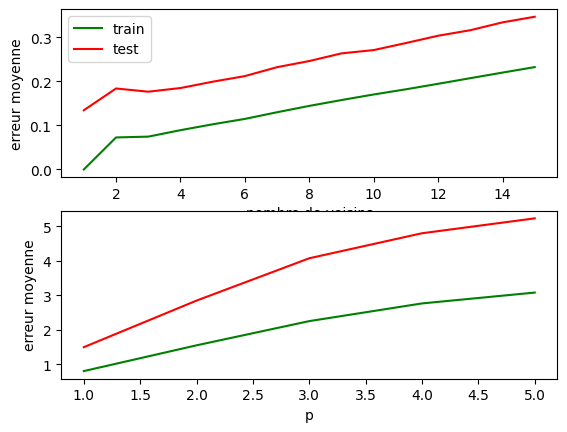

In [6]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du nombre de voisins
plt.subplot(2,1,1) 
plt.plot(df_n_p_train.index, df_n_p_train.mean(axis=1), color='green', label='train')
plt.plot(df_n_p_test.index, df_n_p_test.mean(axis=1), color='red', label='test')
plt.xlabel('nombre de voisins')
plt.ylabel('erreur moyenne')
plt.legend(loc="upper left")

# Evolution de l'erreur moyenne en fonction de p (puissance pour la métrique de minkowski)
plt.subplot(2,1,2) 
plt.plot(df_n_p_train.columns, df_n_p_train.sum(axis=0), color='green')
plt.plot(df_n_p_test.columns, df_n_p_test.sum(axis=0), color='red')
plt.xlabel('p')
plt.ylabel('erreur moyenne')

In [7]:
print('err_min : ', err_min, ' | best number of neighbors : ', best_n, ' | best power for Minkowski : ', best_p)

err_min :  0.023232323232323233  | best number of neighbors :  1  | best power for Minkowski :  1
